## **Question 1:-**

We import the necesary modules - Pandas, Numpy and Matplotlib, and read the given dataset, storing it in a dataframe **data**.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/daily_data.csv')

1. Temp = (Close - Open)/Open * 100
  *   Positive Value indicates profit, while a negative value indicates loss.

2. Daily_Returns = Temp / 100
3. Open / Close and Low / High columns are also created.









In [43]:
data['temp'] = (data.close - data.open) / data.open * 100
data['Daily_Returns'] = data.temp / 100
data['Open/Close'] = data.open / data.close
data['Low/High'] = data.low / data.high

# Sharpe Ratio

We now caluclate the Sharpe Ratio for each day.


**Sharpe Ratio = (Expected Daily Return - Risk Free Rate) / Standard Deviation**

The expected daily return and standard deviation are both rolling, that is, the SD and expected daily return for a day are calculated for all entries upto that particular day.

To implement this we make use of the loc attribute, and for each day, access all entries upto that day. Then we calculate the mean and standard deviation for the temp column of this subdata. For the standard deviation, we have to put the ddof (Delta Degrees of Freedom) argument to 0 to get unbiased SD in while calculating rolling SD.

While we can also calculate SD using formulae, this opertion is much faster.

In [44]:
sharpe_ratio = []
risk_free_rate = 4.23  # 10 year US Treasury bonds interest rate
for i in range(len(data.index)):
  subdata = data.loc[:i+1]  # Getting all entries upto that particular day
  expected_rate = subdata.temp.mean()
  SD = subdata.temp.std(ddof=0)
  if i == 0:
    sharpe_ratio.append("Not Defined")  # Ignoring Day 1 value
  else:
    sharpe_ratio.append((expected_rate - risk_free_rate) / SD)

data['Sharpe_Ratio'] = sharpe_ratio
data

,datetime,high,low,close,open,volume,temp,Daily_Returns,Open/Close,Low/High,Sharpe_Ratio
0,2018-01-01,13818.55,12750.00,13135.00,13715.65,6970.441076,-4.233485,-0.042335,1.044206,0.922673,Not Defined
1,2018-01-02,14750.00,12890.02,14580.00,13135.00,16359.347340,11.001142,0.110011,0.900892,0.873900,-0.250318
2,2018-01-03,15473.49,14150.00,14749.97,14576.87,19457.238601,1.187498,0.011875,0.988264,0.914467,-0.374494
3,2018-01-04,15280.00,13918.04,14811.00,14710.00,18783.876561,0.686608,0.006866,0.993181,0.910866,-0.016657
4,2018-01-05,17118.13,14600.00,16579.00,14805.01,22383.657333,11.982363,0.119824,0.892998,0.852897,-0.102351
...,...,...,...,...,...,...,...,...,...,...,...
1468,2022-01-08,42246.37,40501.00,40679.82,41707.04,27031.900870,-2.462942,-0.024629,1.025251,0.958686,-1.000228
1469,2022-01-09,42300.00,40520.00,41966.99,40679.82,27291.009660,3.164149,0.031641,0.969329,0.957920,-1.000717
1470,2022-01-10,42786.70,39650.00,41604.58,41966.99,51064.904360,-0.863560,-0.008636,1.008711,0.926690,-1.000483
1471,2022-01-11,43100.00,41158.99,42755.00,41604.58,38062.818280,2.765128,0.027651,0.973093,0.954965,-1.000878


Plotting the graph for Temp

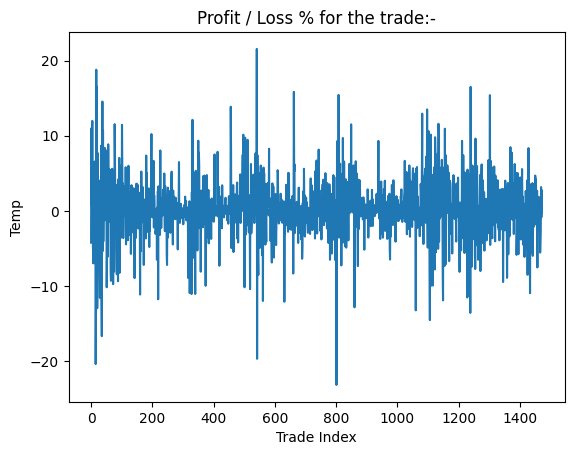

In [45]:
plt.plot(data.temp)
plt.title("Profit / Loss % for the trade:-")
plt.xlabel("Trade Index")
plt.ylabel("Temp")
plt.show()

Plotting the Histogram in the given ranges

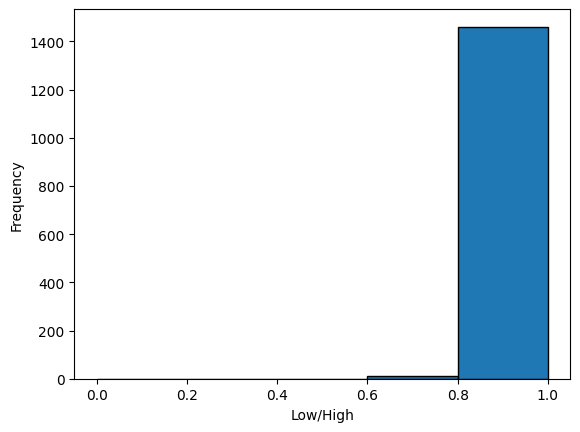

In [46]:
data['Low/High'].plot(kind='hist', edgecolor = 'black', bins = [0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xlabel('Low/High')
plt.show()